In [1]:
is_Mac = True

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
from pathlib import Path
import glob
import itertools
import matplotlib.animation as ani
import os

In [3]:
def GK_to_MeV(k):
    kelvin = k*(10**9)
    MeV = kelvin*8.61732814974493e-11
    return MeV

def kg_to_MeV(k):
    MeV = k*5.6095861672249e29
    return MeV

In [34]:
# enter your file directory for alterbbn_v2.2 
if not is_Mac:
    run_directory_h = 'C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2_hannah/alter_vs.x'
    shell_val = True
    directory_h = 'C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2_hannah'
    run_directory = 'C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2/alter_vs.x'
    directory_h = 'C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2'
else:
    run_directory_h = './alterbbn_v2.2_hannah/alter_vs.x'
    shell_val = False
    directory_h = 'alterbbn_v2.2_hannah'
    run_directory = './alterbbn_v2.2/alter_vs.x'
    directory = 'alterbbn_v2.2'


In [35]:
check_file = Path("evolution_vs.out")
 
if check_file.is_file():
        os.remove(check_file)   

In [60]:
dqdt_csv = np.loadtxt("alterbbn_v2.2/CSV Files/d_dqdt.csv", delimiter=',', usecols=1, unpack=True)[1:]
T_csv = np.loadtxt("alterbbn_v2.2/CSV Files/T_dqdt.csv", delimiter=',', usecols=1, unpack=True)[2:]

In [61]:
dqdt_csv.shape, T_csv.shape

((253,), (253,))

In [65]:
def run_new_code(csv):
    if csv:
        direc = directory
        run_direc = run_directory
    else:
        direc = directory_h
        run_direc = run_directory_h
    ch = subprocess.run(['make','-C', direc, 'clean'], capture_output = True, text = True, shell = shell_val)
    sh = subprocess.run(['make', '-C', direc, 'alter_vs.c'], capture_output = True, text = True, shell = shell_val) ##make clean and make stuff
    print(ch.stderr)
    print(sh.stderr)
    
    command = [run_direc, "14.87365053664758", "6.1e-10", "1", "255", "104.56255360706342", "300", "7e-05"]
    d = subprocess.run(command, capture_output = True, text = True, shell = shell_val)
    print(d.stderr)
    
    return make_arrays()

def make_arrays():
    text = open('evolution_vs.out', "r").readlines()

    aa = text[0]
    dict_temp = aa.split(',')
    dict_temp = [x.strip(' ') for x in dict_temp]
    #print(dict_temp)

    df = pd.DataFrame(columns = dict_temp)
    #print(df)
    for i in range(1, len(text)):
        a = text[i]
        b = a.split(',')
        df.loc[i] = b

    df = df.replace({'\n':''},regex=True)
    df = df.apply(pd.to_numeric)
    
    T = df['T (MeV)'].to_numpy()
    Tnu = df['Tnu (MeV)'].to_numpy()
    dQdt = df['sigma_rad (MeV^4)'].to_numpy() * T
    
    plt.figure()
    plt.semilogx(T, T/Tnu)
    plt.xlim(max(T), min(T))
    
    plt.figure()
    plt.loglog(T, np.abs(dQdt))
    plt.loglog(T_csv, dqdt_csv, 'o')
    plt.xlim(max(T), min(T))
    return T, Tnu, dQdt


make: Circular alter_vs.c <- alter_vs.c dependency dropped.
bbn_constraints.c:18:2: warning: array index 4 is past the end of the array (which contains 4 elements) [-Warray-bounds]
        translate[4]=5;  // He3_H=ratioH[5]
        ^         ~
bbn_constraints.c:13:5: note: array 'translate' declared here
    int translate[4];
    ^
1 warning generated.




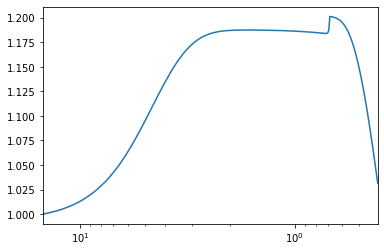

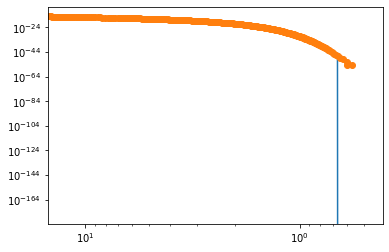

In [66]:
res = run_new_code(True)


make: Circular alter_vs.c <- alter_vs.c dependency dropped.
bbn_constraints.c:18:2: warning: array index 4 is past the end of the array (which contains 4 elements) [-Warray-bounds]
        translate[4]=5;  // He3_H=ratioH[5]
        ^         ~
bbn_constraints.c:13:5: note: array 'translate' declared here
    int translate[4];
    ^
1 warning generated.




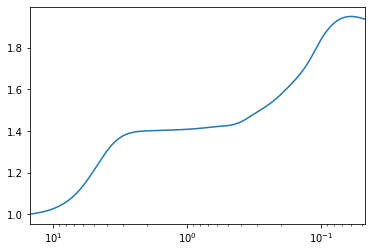

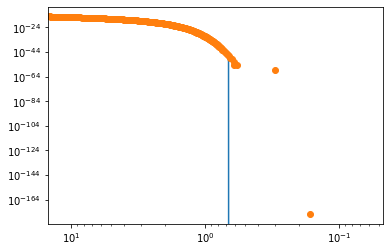

In [67]:
res_h = run_new_code(False)